In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
titanic = pd.read_csv("/Users/jbaafi/Desktop/titanic_data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#We wanna analyse the continuous features in the data
cat_feat = ["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
titanic.drop(cat_feat, axis=1, inplace = True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [7]:
titanic.groupby(titanic["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


Plot continous features in the dataset

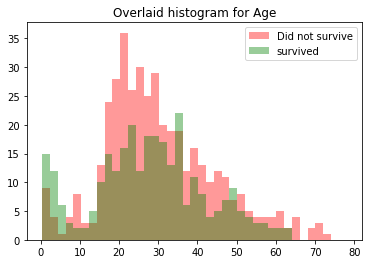

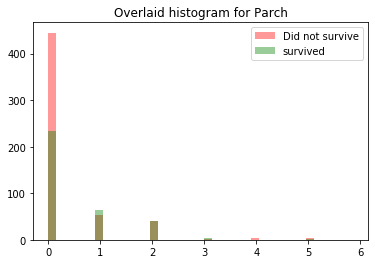

In [8]:
for i in ["Age", "Parch"]:
    died = list(titanic[titanic["Survived"] == 0][i].dropna())
    survived = list(titanic[titanic["Survived"] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color = "r", kde = False, bins = np.arange(xmin, xmax, width))
    sns.distplot(survived, color = "g", kde = False, bins = np.arange(xmin, xmax, width))
    plt.legend(["Did not survive", "survived"])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()

for i, col in enumerate(["Pclass", "SibSp", "Parch"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data=titanic, kind="point", aspect=2)

We can put together features that look similar in their effect on the dataset eg. SibSp and Parch are all about family size and their distribution looks similar so we can merge them together as follows

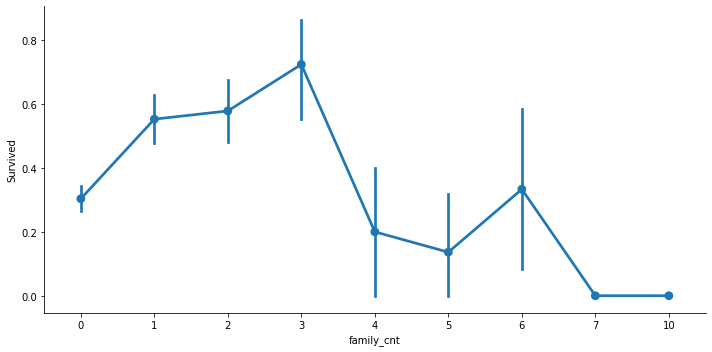

In [10]:
titanic["family_cnt"] = titanic["SibSp"] + titanic["Parch"]
sns.catplot(x="family_cnt", y="Survived", data=titanic, kind="point", aspect=2)

In [11]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


Fill missing values for Age with average values

In [12]:
titanic.groupby(titanic["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


In [13]:
titanic.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
family_cnt      0
dtype: int64

In [14]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
family_cnt    0
dtype: int64

In [16]:
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [18]:
titanic.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
886,0,2,27.000000,0,0,13.00,0
887,1,1,19.000000,0,0,30.00,0
888,0,3,29.699118,1,2,23.45,3
889,1,1,26.000000,0,0,30.00,0
890,0,3,32.000000,0,0,7.75,0
